<div>
    <h1><center style="background-color:#97CEFA; color:red;"> Bitcoin走势预测</center></h1>
</div>

**什么是比特币**

比特币是运行时间最长，最知名的加密货币，由中本聪（Satoshi Nakamoto）于2009年首次以匿名开源形式发布。 

比特币充当数字交换的去中心化媒介，交易经过验证并记录在公共分布式账本（区块链）中，而无需受信任的记录保存机构或中央中介机构。 

事务块包含先前事务块的SHA-256加密哈希，因此被“链接”在一起，作为曾经发生过的所有事务的不可变记录。  

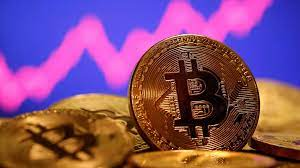

**我们在这个Notebook中学习：**

* 用Facebook开源的**Prophet**预测比特币走势

**分享人：黄佳 《零基础学机器学习》作者**

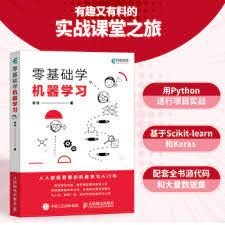

 [书籍链接](https://item.jd.com/12763913.html)

**参考资料：** 本Notebook参考了Some Aditya Mandal的代码

**资料链接：** [书籍及Notebook](https://item.jd.com/12763913.html)


# 第一部分 **比特币数据集的读入和整理**

## 1.1 导入相关的包

In [ ]:
import numpy as np # 数学扩展包
import pandas as pd # 数据处理包
import matplotlib.pyplot as plt # 数据可视化
import seaborn as sns # 数据可视化

import datetime, pytz # 为csv文件中的本机时戳定义转换函数，成为可以读取的时间
def dateparse (time_in_secs):    
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

## 1.2 读入比特币数据集

In [ ]:
# https://www.kaggle.com/datasets/tohuangjia/bitcoin-simple-set 可以从这个链接下载数据集,然后放入当前目录
data = pd.read_csv('./bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv', parse_dates=[0], date_parser=dateparse)
data[-5:]

## 1.3 数据集清理

In [ ]:
data['Timestamp'] = data['Timestamp'].dt.tz_localize(None)
data = data.groupby([pd.Grouper(key='Timestamp', freq='H')]).first().reset_index()
data = data.set_index('Timestamp')
data = data[['Weighted_Price']]
data['Weighted_Price'].fillna(method='ffill', inplace=True)

In [ ]:
data.head()

## 1.4 显示比特币走势曲线

In [ ]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
fig = data.plot(style='', figsize=(15,5), color=color_pal[0], title='BTC Weighted_Price Price (USD) by Hours')

# 第二部分 **通过Facebook Prophet预测价格走势**

## 2.1 导入Prophet包

**第一次运行需安装下面两个包

In [ ]:
# pip install pystan==2.19.1.1

In [ ]:
# pip install prophet

In [ ]:
from fbprophet import Prophet

## 2.2 拆分数据集

In [ ]:
split_date = '25-Dec-2020'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

## 2.3 显示数据集拆分状态

In [ ]:
fig = data_test \
    .rename(columns={'Weighted_Price': 'Test Set'}) \
    .join(data_train.rename(columns={'Weighted_Price': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='BTC Weighted_Price Price (USD) by Hours', style='')

## 2.4 准备训练数据集

In [ ]:
data_train = data_train.reset_index().rename(columns={'Timestamp':'ds', 'Weighted_Price':'y'})

## 2.5 建立模型

In [ ]:
model = Prophet()

## 2.6 拟合模型

In [ ]:
model.fit(data_train)

## 2.7 在测试集上预测后续走势

In [ ]:
data_test_fcst = model.predict(df=data_test.reset_index().rename(columns={'Timestamp':'ds'}))

## 2.8 显示预测数据

In [ ]:
fig = model.plot(data_test_fcst)

## 2.9 将预测数据和实际数据一起显示

In [ ]:
f, ax = plt.subplots()
# f.set_figheight(5)
f.set_figwidth(10)
ax.scatter(data_test.index, data_test['Weighted_Price'], color='r')
fig = model.plot(data_test_fcst, ax=ax)

## 2.10 计算模型的预测误差

In [ ]:
from sklearn.metrics import mean_squared_error # 均方误差
mean_squared_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test_fcst['yhat'])

**至此，这个项目就完成了。**

不难看出，要预测未来，尤其是高波动性的金融衍生品非常困难。
以后我们还可以探讨使用其它一些方法预测比特币，并将各种方法的结果进行比较，评价。

例如：
* 用**LSTM**预测比特币走势
* 用**XGBoost**预测比特币走势
* 用**ARIMA**预测比特币走势

敬请期待。。。